### Let's play around with plantCV

In [2]:
from plantcv import plantcv as pcv
import numpy as np
import os

In [119]:
class options:
    def __init__(self):
        self.image = "Sativa_AS/LK164_IL475.jpeg"
        self.debug = "plot"
        self.writeimg = False
        self.result = "arabidopsis_results.txt"
        self.outdir = "."

In [120]:
# args holds the input variables
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

# Set plotting size (default = 100)
pcv.params.dpi = 100

# Increase text size and thickness to make labels clearer
# (size may need to be altered based on original image size)
pcv.params.text_size = 10
pcv.params.text_thickness = 20

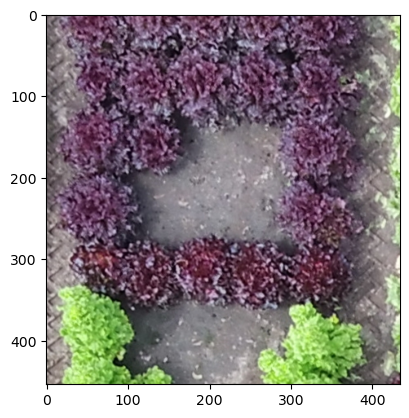

In [121]:
img, path, filename = pcv.readimage(filename=args.image)

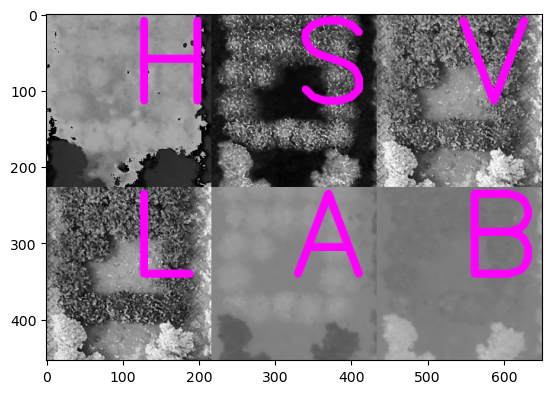

In [122]:
colorspaces = pcv.visualize.colorspaces(rgb_img=img, original_img=False)

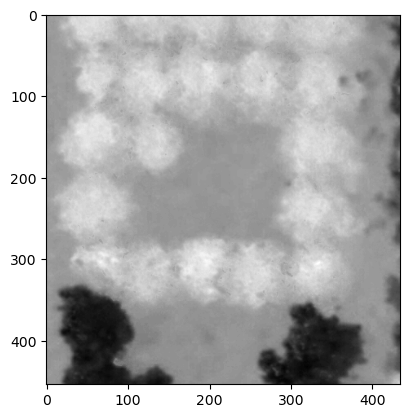

In [123]:
a = pcv.rgb2gray_lab(rgb_img=img, channel='a')

In [92]:
pcv.params.debug = "plot"

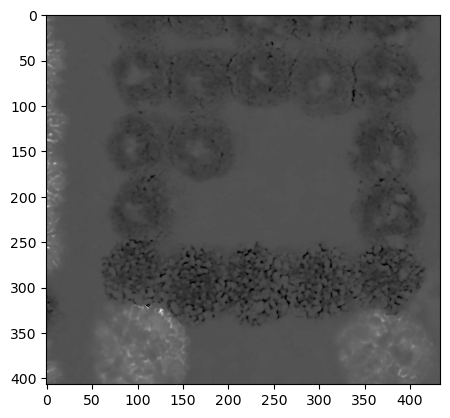

In [114]:
egi = pcv.spectral_index.egi(img)

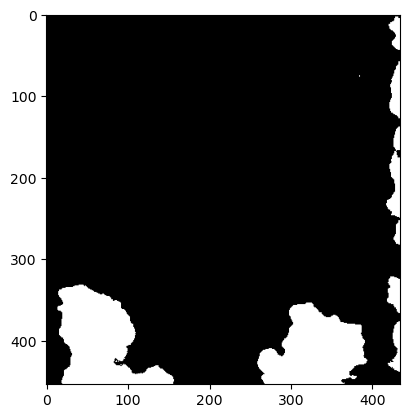

In [124]:
a_thresh = pcv.threshold.otsu(gray_img=a, max_value=255, object_type='dark')

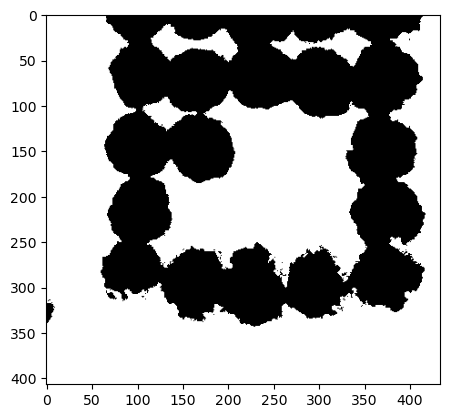

In [116]:
a_fill = pcv.fill(bin_img=a_thresh, size=200)

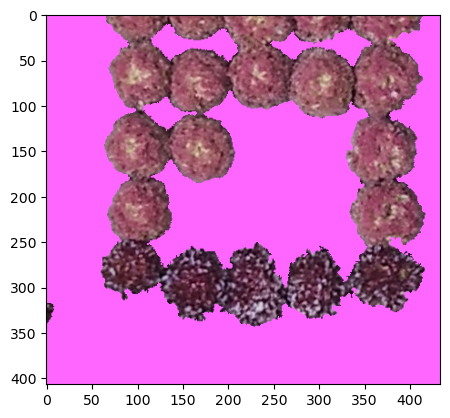

In [117]:
obj, obj_hierarchy = pcv.find_objects(img=img, mask=a_fill)

In [37]:
len(obj)

18

In [83]:
pcv.params.debug = "print"
crop_img2 = pcv.auto_crop(img=img, obj=obj[17], padding_x=20, padding_y=20, color='image')

In [118]:
rois, roi_hierarchy = pcv.roi.multi(img=img, coord=(70,55), radius=32, 
                                    spacing=(70, 70), nrows=7, ncols=5)

RuntimeError: An ROI extends outside of the image!

#### Skeletonize

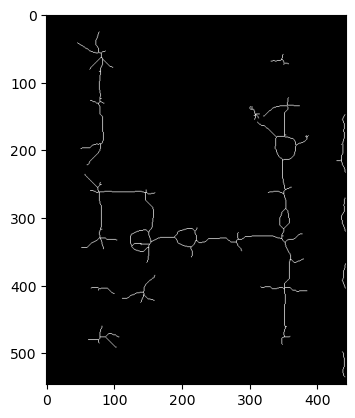

In [100]:
pcv.params.debug = "plot"

skeleton = pcv.morphology.skeletonize(mask=a_fill)

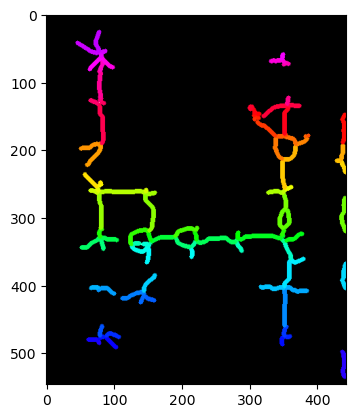

In [108]:
segmented_img, obj = pcv.morphology.segment_skeleton(skel_img=skeleton)

#### Check cyles

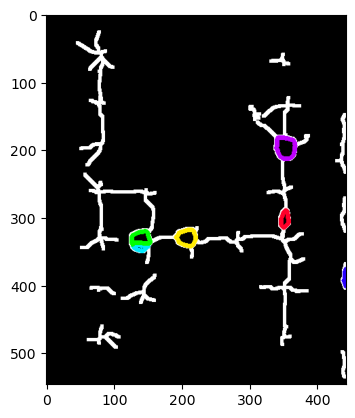

In [101]:
cycle_img = pcv.morphology.check_cycles(skel_img=skeleton, label="default")

# Access data stored out from check_cycles
num_cycles = pcv.outputs.observations['default']['num_cycles']['value']

#### Fill segments

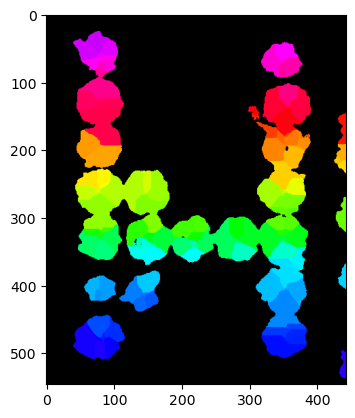

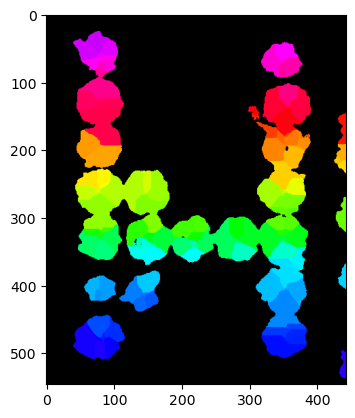

In [107]:
filled_mask = pcv.morphology.fill_segments(mask=a_fill, objects=obj, label="default")

# Convert labeled mask to a colorized image
filled_image = pcv.visualize.colorize_label_img(label_img=filled_mask)

# Access data stored out from fill_segments
segments_area = pcv.outputs.observations['default']['segment_area']['value']
